# Experiment 2: exercise 2
***

## Importing Libraries

In [1]:
import math
import random
import numpy as np
from numpy import dot
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')

%matplotlib inline

## Activation Functions

In [2]:
def sigmoid(x):
    return 2 / (1 + np.exp(-x)) - 1

def sigmoid_d(x):
    return 1/2 * (1 - x**2)

def tanh(x):
    return np.tanh(x)

def tanh_d(x):
    return 1 - (x ** 2)

def step(x):
    return np.heaviside(x, 1)

def step_d(x):
    return NotImplemented

def relu(x):
    return max(np.zeros(1), x)

def relu_d(x):
    return int(x >= 0)

## Perceptron

In [3]:
class Perceptron:
    def __init__(self, rate=0.5, min_error=0.1, act=sigmoid, act_d=sigmoid_d, seed=1, scale=1):
        
        #learning_rate
        self.rate = rate
        #activation function
        self.act = act
        #derivative of the activation function
        self.act_d = act_d
        #minimum error
        self.min_error = min_error
        #random state
        self.random_state = np.random.RandomState(seed)
        #scale for weight and bias
        self.scale = scale

    def fit(self, X, y, epochs, export='plot.png'):
        
        #number of features
        n = 1000
        #initial bias
        self.b = self.random_state.random() / self.scale
        #initial weights
        self.w = self.random_state.random((1, 3)) / self.scale
        print(self.w)
        # loss error and MSE list
        errors = []
        MSEs = []

        for epoch in range(epochs):
            error = 0
            mse = 0
            for i in range(n):
                
                #output for each data X
                o = self.predict(X[i])
                #updating weight and bias
                #print("hi" , type(y[i] - o) ,y[i] , o , self.act_d(o) , X[i])
                self.w = self.w + self.rate * (y[i] - o) * self.act_d(o) * X[i]
                self.b = self.b + self.rate * (y[i] - o) * self.act_d(o)
                
                #calculating loss error and MSE for each data
                error += 1/2 * (y[i] - o)**2
                mse += (y[i] - o)**2
                #print("x[i]", X[i] , "o: ", o)
            #add loss error and mse for each iteration to the list
            errors.append(error)
            MSEs.append(mse / n)
            print(f'> {epoch}\t{error}')
            
            if error < self.min_error:
                break
        #plot loss error and mse
        fig, ax = plt.subplots(2 , figsize=(10,10))
        ax[0].plot(errors)
        ax[1].plot(MSEs)
        
        ax[0].set_ylabel("loss error")
        ax[0].set_xlabel("epoch")
        ax[1].set_ylabel("MSE")
        ax[1].set_xlabel("epoch")
        
        fig.savefig(export)
    
    #output function
    def predict(self, x):
        return self.act(np.dot(self.w, x) + self.b)

## Data

In [4]:
def f_x(x , y):
    return x ** 2 + y ** 2


In [5]:
X = []
Y = []
R = 1
r = 0.25
for x in np.linspace(0 , 2 , 1000):
    for y in np.linspace(0 , 2 , 1000):
        f = f_x(x , y)
        X.append([x , y , f])
        if(f <= R and f >= r):
            Y.append(1.0)
        else:
            Y.append(0.0)

## Training Data

[[7.20324493e-01 1.14374817e-04 3.02332573e-01]]
> 0	[1.18263862]
> 1	[1.19125196]
> 2	[1.30803573]
> 3	[1.45930436]
> 4	[1.53721214]
> 5	[1.55996083]
> 6	[1.55118804]
> 7	[1.5273244]
> 8	[1.4994121]
> 9	[1.4696384]
> 10	[1.43877196]
> 11	[1.40761942]
> 12	[1.37685319]
> 13	[1.34698966]
> 14	[1.31839763]
> 15	[1.29132588]
> 16	[1.26593277]
> 17	[1.24230804]
> 18	[1.22048878]
> 19	[1.20047762]
> 20	[1.18224797]
> 21	[1.16576022]
> 22	[1.15095752]
> 23	[1.1377779]
> 24	[1.12615313]
> 25	[1.11601528]
> 26	[1.10729114]
> 27	[1.09991272]
> 28	[1.09381089]
> 29	[1.08891658]
> 30	[1.08516266]
> 31	[1.08248923]
> 32	[1.08083302]
> 33	[1.07995956]
> 34	[1.0791968]
> 35	[1.07850255]
> 36	[1.07786013]
> 37	[1.07726317]
> 38	[1.07671194]
> 39	[1.07619227]
> 40	[1.07571285]
> 41	[1.07527643]
> 42	[1.07485927]
> 43	[1.07448732]
> 44	[1.0741285]
> 45	[1.07379996]
> 46	[1.07350134]
> 47	[1.07322603]
> 48	[1.07297159]
> 49	[1.07273662]
> 50	[1.07252074]
> 51	[1.07232441]
> 52	[1.07214888]
> 53	[1.07199

> 441	[1.05784031]
> 442	[1.05780264]
> 443	[1.05776818]
> 444	[1.05773692]
> 445	[1.05770887]
> 446	[1.05768403]
> 447	[1.05766238]
> 448	[1.05764393]
> 449	[1.05762865]
> 450	[1.05761655]
> 451	[1.05758518]
> 452	[1.0575472]
> 453	[1.05751228]
> 454	[1.0574804]
> 455	[1.05745158]
> 456	[1.05742581]
> 457	[1.05740308]
> 458	[1.0573834]
> 459	[1.05736675]
> 460	[1.05735311]
> 461	[1.05733827]
> 462	[1.05729913]
> 463	[1.05726288]
> 464	[1.05722954]
> 465	[1.0571991]
> 466	[1.05717157]
> 467	[1.05714694]
> 468	[1.0571252]
> 469	[1.05710636]
> 470	[1.05709039]
> 471	[1.0570773]
> 472	[1.05705987]
> 473	[1.05702156]
> 474	[1.056986]
> 475	[1.05695321]
> 476	[1.05692317]
> 477	[1.05689589]
> 478	[1.05687138]
> 479	[1.05684962]
> 480	[1.05683061]
> 481	[1.05681433]
> 482	[1.05680079]
> 483	[1.05678997]
> 484	[1.05675213]
> 485	[1.05671633]
> 486	[1.05668314]
> 487	[1.05665257]
> 488	[1.05662464]
> 489	[1.05659932]
> 490	[1.05657663]
> 491	[1.05655655]
> 492	[1.05653907]
> 493	[1.0565242]
> 

> 878	[1.04888843]
> 879	[1.0488746]
> 880	[1.04886145]
> 881	[1.048849]
> 882	[1.04883724]
> 883	[1.04882616]
> 884	[1.04881577]
> 885	[1.04880607]
> 886	[1.04879705]
> 887	[1.04878871]
> 888	[1.04878105]
> 889	[1.04876245]
> 890	[1.04873861]
> 891	[1.04871541]
> 892	[1.04869285]
> 893	[1.04867095]
> 894	[1.0486497]
> 895	[1.0486291]
> 896	[1.04860916]
> 897	[1.04858988]
> 898	[1.04857125]
> 899	[1.04855328]
> 900	[1.04853596]
> 901	[1.04851929]
> 902	[1.04850328]
> 903	[1.04848792]
> 904	[1.04847321]
> 905	[1.04845914]
> 906	[1.04844573]
> 907	[1.04843296]
> 908	[1.04842083]
> 909	[1.04840934]
> 910	[1.0483985]
> 911	[1.04838829]
> 912	[1.04837872]
> 913	[1.04836978]
> 914	[1.04836148]
> 915	[1.0483538]
> 916	[1.04834069]
> 917	[1.04831727]
> 918	[1.04829445]
> 919	[1.04827222]
> 920	[1.0482506]
> 921	[1.04822959]
> 922	[1.04820918]
> 923	[1.04818939]
> 924	[1.0481702]
> 925	[1.04815162]
> 926	[1.04813365]
> 927	[1.04811629]
> 928	[1.04809953]
> 929	[1.04808339]
> 930	[1.04806785]
> 

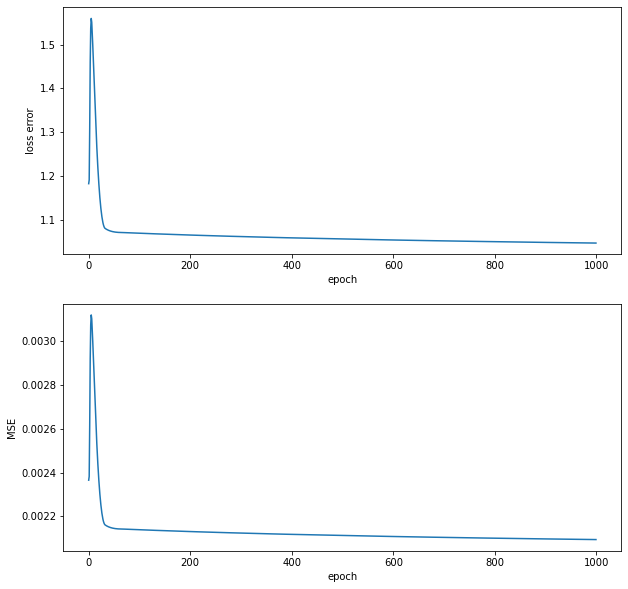

In [6]:
clf = Perceptron(act=relu, act_d=relu_d)
clf.fit(X, Y, 1000, export=f'mse.png')